## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              97.90
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   3.92e-114
Time:                        10:47:56   Log-Likelihood:                         -293.46
No. Observations:                 404   AIC:                                      612.9
Df Residuals:                     391   BIC:                                      664.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

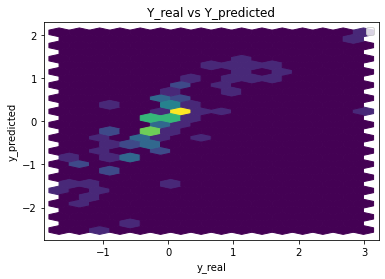

Performance Metrics
Mean Squared Error: 0.30528000826472246
Mean Absolute Error: 0.3636835853696945
Manhattan distance: 37.095725707708844
Euclidean distance: 5.580193620565659


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.12389160719566851


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9715862	total: 70.3ms	remaining: 1m 10s
1:	learn: 0.9532496	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9350453	total: 72.5ms	remaining: 24.1s
3:	learn: 0.9200166	total: 73.7ms	remaining: 18.4s
4:	learn: 0.9034874	total: 74.9ms	remaining: 14.9s
5:	learn: 0.8870984	total: 76ms	remaining: 12.6s
6:	learn: 0.8717922	total: 77ms	remaining: 10.9s
7:	learn: 0.8551761	total: 78.1ms	remaining: 9.68s
8:	learn: 0.8405679	total: 79ms	remaining: 8.7s
9:	learn: 0.8251680	total: 80.2ms	remaining: 7.93s
10:	learn: 0.8114222	total: 81.2ms	remaining: 7.3s
11:	learn: 0.7977475	total: 82.1ms	remaining: 6.76s
12:	learn: 0.7830349	total: 83.1ms	remaining: 6.31s
13:	learn: 0.7701391	total: 84.1ms	remaining: 5.92s
14:	learn: 0.7586172	total: 85.1ms	remaining: 5.59s
15:	learn: 0.7457707	total: 86.1ms	remaining: 5.29s
16:	learn: 0.7345508	total: 87ms	remaining: 5.03s
17:	learn: 0.7227747	total: 88ms	remaining: 4.8s
18:	learn: 0.7108096	total: 88.9ms	remaining: 4.59s
19:	learn: 0.6979234	total: 89.8ms

101:	learn: 0.3172164	total: 161ms	remaining: 1.42s
102:	learn: 0.3150381	total: 162ms	remaining: 1.41s
103:	learn: 0.3132106	total: 163ms	remaining: 1.4s
104:	learn: 0.3118746	total: 164ms	remaining: 1.4s
105:	learn: 0.3102169	total: 165ms	remaining: 1.39s
106:	learn: 0.3083402	total: 165ms	remaining: 1.38s
107:	learn: 0.3070310	total: 166ms	remaining: 1.37s
108:	learn: 0.3053197	total: 167ms	remaining: 1.37s
109:	learn: 0.3039563	total: 168ms	remaining: 1.36s
110:	learn: 0.3028199	total: 169ms	remaining: 1.35s
111:	learn: 0.3014988	total: 170ms	remaining: 1.34s
112:	learn: 0.3002084	total: 171ms	remaining: 1.34s
113:	learn: 0.2985656	total: 172ms	remaining: 1.33s
114:	learn: 0.2971559	total: 173ms	remaining: 1.33s
115:	learn: 0.2958295	total: 173ms	remaining: 1.32s
116:	learn: 0.2943482	total: 174ms	remaining: 1.31s
117:	learn: 0.2932511	total: 175ms	remaining: 1.31s
118:	learn: 0.2921011	total: 176ms	remaining: 1.3s
119:	learn: 0.2907440	total: 177ms	remaining: 1.3s
120:	learn: 0.28

137:	learn: 0.2708413	total: 193ms	remaining: 1.21s
138:	learn: 0.2701172	total: 194ms	remaining: 1.2s
139:	learn: 0.2693028	total: 195ms	remaining: 1.2s
140:	learn: 0.2683653	total: 196ms	remaining: 1.19s
141:	learn: 0.2670777	total: 197ms	remaining: 1.19s
142:	learn: 0.2662271	total: 198ms	remaining: 1.18s
143:	learn: 0.2650302	total: 199ms	remaining: 1.18s
144:	learn: 0.2642123	total: 199ms	remaining: 1.18s
145:	learn: 0.2632952	total: 200ms	remaining: 1.17s
146:	learn: 0.2621649	total: 201ms	remaining: 1.17s
147:	learn: 0.2612851	total: 202ms	remaining: 1.16s
148:	learn: 0.2601281	total: 203ms	remaining: 1.16s
149:	learn: 0.2592229	total: 204ms	remaining: 1.15s
150:	learn: 0.2584120	total: 205ms	remaining: 1.15s
151:	learn: 0.2575468	total: 205ms	remaining: 1.15s
152:	learn: 0.2567288	total: 206ms	remaining: 1.14s
153:	learn: 0.2560260	total: 207ms	remaining: 1.14s
154:	learn: 0.2550728	total: 208ms	remaining: 1.13s
155:	learn: 0.2537521	total: 209ms	remaining: 1.13s
156:	learn: 0.

212:	learn: 0.2150647	total: 261ms	remaining: 965ms
213:	learn: 0.2142969	total: 262ms	remaining: 963ms
214:	learn: 0.2137257	total: 263ms	remaining: 960ms
215:	learn: 0.2132556	total: 264ms	remaining: 958ms
216:	learn: 0.2131088	total: 265ms	remaining: 956ms
217:	learn: 0.2126421	total: 266ms	remaining: 954ms
218:	learn: 0.2121709	total: 267ms	remaining: 951ms
219:	learn: 0.2115346	total: 268ms	remaining: 949ms
220:	learn: 0.2112416	total: 268ms	remaining: 946ms
221:	learn: 0.2107467	total: 269ms	remaining: 944ms
222:	learn: 0.2101444	total: 270ms	remaining: 941ms
223:	learn: 0.2097139	total: 271ms	remaining: 939ms
224:	learn: 0.2091895	total: 272ms	remaining: 936ms
225:	learn: 0.2084958	total: 273ms	remaining: 934ms
226:	learn: 0.2077962	total: 274ms	remaining: 932ms
227:	learn: 0.2075417	total: 275ms	remaining: 930ms
228:	learn: 0.2069820	total: 275ms	remaining: 927ms
229:	learn: 0.2063618	total: 276ms	remaining: 925ms
230:	learn: 0.2056173	total: 277ms	remaining: 923ms
231:	learn: 

316:	learn: 0.1701914	total: 353ms	remaining: 761ms
317:	learn: 0.1700366	total: 354ms	remaining: 759ms
318:	learn: 0.1695327	total: 355ms	remaining: 758ms
319:	learn: 0.1692279	total: 356ms	remaining: 756ms
320:	learn: 0.1690014	total: 357ms	remaining: 754ms
321:	learn: 0.1688007	total: 357ms	remaining: 753ms
322:	learn: 0.1685973	total: 358ms	remaining: 751ms
323:	learn: 0.1681340	total: 359ms	remaining: 750ms
324:	learn: 0.1677250	total: 360ms	remaining: 748ms
325:	learn: 0.1673042	total: 361ms	remaining: 747ms
326:	learn: 0.1669055	total: 362ms	remaining: 745ms
327:	learn: 0.1665803	total: 363ms	remaining: 744ms
328:	learn: 0.1662142	total: 364ms	remaining: 742ms
329:	learn: 0.1658533	total: 365ms	remaining: 741ms
330:	learn: 0.1655286	total: 366ms	remaining: 739ms
331:	learn: 0.1652911	total: 367ms	remaining: 738ms
332:	learn: 0.1651779	total: 367ms	remaining: 736ms
333:	learn: 0.1646657	total: 368ms	remaining: 735ms
334:	learn: 0.1641444	total: 369ms	remaining: 733ms
335:	learn: 

352:	learn: 0.1582951	total: 385ms	remaining: 706ms
353:	learn: 0.1581351	total: 386ms	remaining: 705ms
354:	learn: 0.1580191	total: 387ms	remaining: 703ms
355:	learn: 0.1576782	total: 388ms	remaining: 702ms
356:	learn: 0.1574727	total: 389ms	remaining: 700ms
357:	learn: 0.1571071	total: 390ms	remaining: 699ms
358:	learn: 0.1569637	total: 390ms	remaining: 697ms
359:	learn: 0.1567024	total: 391ms	remaining: 696ms
360:	learn: 0.1563978	total: 392ms	remaining: 694ms
361:	learn: 0.1560655	total: 393ms	remaining: 693ms
362:	learn: 0.1558092	total: 394ms	remaining: 691ms
363:	learn: 0.1556327	total: 395ms	remaining: 690ms
364:	learn: 0.1554115	total: 396ms	remaining: 689ms
365:	learn: 0.1552542	total: 397ms	remaining: 687ms
366:	learn: 0.1551390	total: 398ms	remaining: 686ms
367:	learn: 0.1546878	total: 399ms	remaining: 684ms
368:	learn: 0.1544694	total: 399ms	remaining: 683ms
369:	learn: 0.1540502	total: 400ms	remaining: 682ms
370:	learn: 0.1537327	total: 401ms	remaining: 680ms
371:	learn: 

428:	learn: 0.1378258	total: 453ms	remaining: 603ms
429:	learn: 0.1373826	total: 454ms	remaining: 602ms
430:	learn: 0.1371596	total: 455ms	remaining: 600ms
431:	learn: 0.1367827	total: 456ms	remaining: 599ms
432:	learn: 0.1366174	total: 457ms	remaining: 598ms
433:	learn: 0.1363360	total: 458ms	remaining: 597ms
434:	learn: 0.1360197	total: 459ms	remaining: 596ms
435:	learn: 0.1358228	total: 460ms	remaining: 594ms
436:	learn: 0.1356760	total: 460ms	remaining: 593ms
437:	learn: 0.1355186	total: 461ms	remaining: 592ms
438:	learn: 0.1353590	total: 462ms	remaining: 591ms
439:	learn: 0.1352976	total: 463ms	remaining: 589ms
440:	learn: 0.1349713	total: 464ms	remaining: 588ms
441:	learn: 0.1346766	total: 465ms	remaining: 587ms
442:	learn: 0.1345700	total: 466ms	remaining: 586ms
443:	learn: 0.1343473	total: 467ms	remaining: 584ms
444:	learn: 0.1340275	total: 468ms	remaining: 583ms
445:	learn: 0.1337385	total: 468ms	remaining: 582ms
446:	learn: 0.1334775	total: 469ms	remaining: 580ms
447:	learn: 

528:	learn: 0.1169651	total: 544ms	remaining: 484ms
529:	learn: 0.1166593	total: 545ms	remaining: 483ms
530:	learn: 0.1163951	total: 546ms	remaining: 482ms
531:	learn: 0.1162337	total: 547ms	remaining: 481ms
532:	learn: 0.1160072	total: 548ms	remaining: 480ms
533:	learn: 0.1158218	total: 548ms	remaining: 478ms
534:	learn: 0.1155243	total: 549ms	remaining: 477ms
535:	learn: 0.1153507	total: 550ms	remaining: 476ms
536:	learn: 0.1151557	total: 551ms	remaining: 475ms
537:	learn: 0.1149395	total: 552ms	remaining: 474ms
538:	learn: 0.1146800	total: 553ms	remaining: 473ms
539:	learn: 0.1143634	total: 553ms	remaining: 471ms
540:	learn: 0.1141686	total: 554ms	remaining: 470ms
541:	learn: 0.1139506	total: 555ms	remaining: 469ms
542:	learn: 0.1137916	total: 556ms	remaining: 468ms
543:	learn: 0.1136743	total: 557ms	remaining: 467ms
544:	learn: 0.1135950	total: 558ms	remaining: 466ms
545:	learn: 0.1134926	total: 559ms	remaining: 465ms
546:	learn: 0.1133993	total: 560ms	remaining: 463ms
547:	learn: 

565:	learn: 0.1102179	total: 576ms	remaining: 442ms
566:	learn: 0.1099518	total: 577ms	remaining: 441ms
567:	learn: 0.1096292	total: 578ms	remaining: 440ms
568:	learn: 0.1095335	total: 579ms	remaining: 439ms
569:	learn: 0.1093962	total: 580ms	remaining: 438ms
570:	learn: 0.1092127	total: 582ms	remaining: 437ms
571:	learn: 0.1090225	total: 583ms	remaining: 436ms
572:	learn: 0.1088740	total: 584ms	remaining: 435ms
573:	learn: 0.1087487	total: 584ms	remaining: 434ms
574:	learn: 0.1085668	total: 585ms	remaining: 433ms
575:	learn: 0.1084230	total: 586ms	remaining: 431ms
576:	learn: 0.1082686	total: 587ms	remaining: 430ms
577:	learn: 0.1081381	total: 588ms	remaining: 429ms
578:	learn: 0.1078906	total: 589ms	remaining: 428ms
579:	learn: 0.1076995	total: 589ms	remaining: 427ms
580:	learn: 0.1073836	total: 590ms	remaining: 426ms
581:	learn: 0.1072228	total: 591ms	remaining: 425ms
582:	learn: 0.1070750	total: 592ms	remaining: 423ms
583:	learn: 0.1068928	total: 593ms	remaining: 422ms
584:	learn: 

642:	learn: 0.0979909	total: 644ms	remaining: 358ms
643:	learn: 0.0978223	total: 645ms	remaining: 357ms
644:	learn: 0.0976875	total: 646ms	remaining: 356ms
645:	learn: 0.0976316	total: 647ms	remaining: 355ms
646:	learn: 0.0974440	total: 648ms	remaining: 354ms
647:	learn: 0.0974064	total: 649ms	remaining: 353ms
648:	learn: 0.0973324	total: 650ms	remaining: 352ms
649:	learn: 0.0972613	total: 651ms	remaining: 351ms
650:	learn: 0.0971446	total: 652ms	remaining: 349ms
651:	learn: 0.0969264	total: 653ms	remaining: 348ms
652:	learn: 0.0968213	total: 654ms	remaining: 347ms
653:	learn: 0.0966233	total: 655ms	remaining: 346ms
654:	learn: 0.0964648	total: 655ms	remaining: 345ms
655:	learn: 0.0962713	total: 656ms	remaining: 344ms
656:	learn: 0.0961807	total: 657ms	remaining: 343ms
657:	learn: 0.0959763	total: 658ms	remaining: 342ms
658:	learn: 0.0958262	total: 659ms	remaining: 341ms
659:	learn: 0.0955764	total: 660ms	remaining: 340ms
660:	learn: 0.0954145	total: 661ms	remaining: 339ms
661:	learn: 

743:	learn: 0.0848694	total: 736ms	remaining: 253ms
744:	learn: 0.0846189	total: 737ms	remaining: 252ms
745:	learn: 0.0844234	total: 738ms	remaining: 251ms
746:	learn: 0.0843369	total: 739ms	remaining: 250ms
747:	learn: 0.0842658	total: 739ms	remaining: 249ms
748:	learn: 0.0840809	total: 740ms	remaining: 248ms
749:	learn: 0.0839853	total: 741ms	remaining: 247ms
750:	learn: 0.0839269	total: 742ms	remaining: 246ms
751:	learn: 0.0837410	total: 743ms	remaining: 245ms
752:	learn: 0.0835391	total: 744ms	remaining: 244ms
753:	learn: 0.0833836	total: 745ms	remaining: 243ms
754:	learn: 0.0832821	total: 746ms	remaining: 242ms
755:	learn: 0.0831872	total: 747ms	remaining: 241ms
756:	learn: 0.0830761	total: 748ms	remaining: 240ms
757:	learn: 0.0830591	total: 749ms	remaining: 239ms
758:	learn: 0.0830009	total: 749ms	remaining: 238ms
759:	learn: 0.0829166	total: 750ms	remaining: 237ms
760:	learn: 0.0828297	total: 751ms	remaining: 236ms
761:	learn: 0.0827325	total: 752ms	remaining: 235ms
762:	learn: 

778:	learn: 0.0806251	total: 767ms	remaining: 218ms
779:	learn: 0.0803800	total: 768ms	remaining: 217ms
780:	learn: 0.0803506	total: 769ms	remaining: 216ms
781:	learn: 0.0802788	total: 770ms	remaining: 215ms
782:	learn: 0.0802094	total: 771ms	remaining: 214ms
783:	learn: 0.0800900	total: 772ms	remaining: 213ms
784:	learn: 0.0799980	total: 773ms	remaining: 212ms
785:	learn: 0.0799518	total: 774ms	remaining: 211ms
786:	learn: 0.0799388	total: 775ms	remaining: 210ms
787:	learn: 0.0798028	total: 776ms	remaining: 209ms
788:	learn: 0.0797839	total: 777ms	remaining: 208ms
789:	learn: 0.0797382	total: 778ms	remaining: 207ms
790:	learn: 0.0795216	total: 778ms	remaining: 206ms
791:	learn: 0.0793938	total: 779ms	remaining: 205ms
792:	learn: 0.0793286	total: 780ms	remaining: 204ms
793:	learn: 0.0792201	total: 781ms	remaining: 203ms
794:	learn: 0.0790662	total: 782ms	remaining: 202ms
795:	learn: 0.0789951	total: 783ms	remaining: 201ms
796:	learn: 0.0789296	total: 784ms	remaining: 200ms
797:	learn: 

852:	learn: 0.0733789	total: 836ms	remaining: 144ms
853:	learn: 0.0733156	total: 837ms	remaining: 143ms
854:	learn: 0.0732402	total: 838ms	remaining: 142ms
855:	learn: 0.0731404	total: 839ms	remaining: 141ms
856:	learn: 0.0730233	total: 839ms	remaining: 140ms
857:	learn: 0.0728514	total: 841ms	remaining: 139ms
858:	learn: 0.0727497	total: 841ms	remaining: 138ms
859:	learn: 0.0726835	total: 842ms	remaining: 137ms
860:	learn: 0.0725900	total: 843ms	remaining: 136ms
861:	learn: 0.0725037	total: 844ms	remaining: 135ms
862:	learn: 0.0723452	total: 845ms	remaining: 134ms
863:	learn: 0.0722127	total: 846ms	remaining: 133ms
864:	learn: 0.0721608	total: 847ms	remaining: 132ms
865:	learn: 0.0721172	total: 848ms	remaining: 131ms
866:	learn: 0.0720397	total: 849ms	remaining: 130ms
867:	learn: 0.0719350	total: 849ms	remaining: 129ms
868:	learn: 0.0717712	total: 850ms	remaining: 128ms
869:	learn: 0.0717067	total: 851ms	remaining: 127ms
870:	learn: 0.0715928	total: 852ms	remaining: 126ms
871:	learn: 

951:	learn: 0.0643815	total: 927ms	remaining: 46.8ms
952:	learn: 0.0642630	total: 928ms	remaining: 45.8ms
953:	learn: 0.0642031	total: 929ms	remaining: 44.8ms
954:	learn: 0.0641272	total: 930ms	remaining: 43.8ms
955:	learn: 0.0640521	total: 931ms	remaining: 42.9ms
956:	learn: 0.0639361	total: 932ms	remaining: 41.9ms
957:	learn: 0.0639286	total: 933ms	remaining: 40.9ms
958:	learn: 0.0637804	total: 934ms	remaining: 39.9ms
959:	learn: 0.0636716	total: 935ms	remaining: 38.9ms
960:	learn: 0.0636001	total: 936ms	remaining: 38ms
961:	learn: 0.0635275	total: 936ms	remaining: 37ms
962:	learn: 0.0634800	total: 937ms	remaining: 36ms
963:	learn: 0.0634415	total: 938ms	remaining: 35ms
964:	learn: 0.0633565	total: 939ms	remaining: 34.1ms
965:	learn: 0.0632307	total: 940ms	remaining: 33.1ms
966:	learn: 0.0631925	total: 941ms	remaining: 32.1ms
967:	learn: 0.0631020	total: 942ms	remaining: 31.1ms
968:	learn: 0.0630001	total: 943ms	remaining: 30.2ms
969:	learn: 0.0629258	total: 944ms	remaining: 29.2ms
9

984:	learn: 0.0617290	total: 959ms	remaining: 14.6ms
985:	learn: 0.0616510	total: 960ms	remaining: 13.6ms
986:	learn: 0.0614904	total: 961ms	remaining: 12.7ms
987:	learn: 0.0613897	total: 962ms	remaining: 11.7ms
988:	learn: 0.0613090	total: 963ms	remaining: 10.7ms
989:	learn: 0.0612614	total: 964ms	remaining: 9.73ms
990:	learn: 0.0612298	total: 965ms	remaining: 8.76ms
991:	learn: 0.0611985	total: 965ms	remaining: 7.79ms
992:	learn: 0.0611861	total: 966ms	remaining: 6.81ms
993:	learn: 0.0611549	total: 967ms	remaining: 5.84ms
994:	learn: 0.0610759	total: 969ms	remaining: 4.87ms
995:	learn: 0.0610616	total: 969ms	remaining: 3.89ms
996:	learn: 0.0609597	total: 970ms	remaining: 2.92ms
997:	learn: 0.0608914	total: 971ms	remaining: 1.95ms
998:	learn: 0.0607932	total: 972ms	remaining: 973us
999:	learn: 0.0607679	total: 973ms	remaining: 0us
Mean Squared error 0.08812227365038276


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.0155261367876784
